In [28]:
import numpy as np
from itertools import product

# defining the condition of det = 0 for me to wina 3x3 game
def calculate_winner(matrix):
    determinant = int(np.linalg.det(matrix))
    return "You" if determinant == 0 else "Friend"

# generate the possible game matrices
def generate_matrices():
    possible_values = [0, 1] # restricting the matrix entries
    matrices = list(product(possible_values, repeat=9))
    valid_matrices = [matrix for matrix in matrices if sum(matrix) in {4, 5}]
    return [np.array(matrix).reshape((3, 3)) for matrix in valid_matrices]


def main():
    matrices = generate_matrices()
    total_games = len(matrices)
    win_counts = {"You": 0, "Friend": 0}

    for matrix in matrices:
        winner = calculate_winner(matrix)
        win_counts[winner] += 1

    # calculating probabilities from the total possible game matrices
    probability_you_win = win_counts["You"] / total_games
    probability_friend_wins = win_counts["Friend"] / total_games

    print("Total Possible Games:", total_games)
    print("Number of Games I Win:", win_counts["You"])
    print("Number of Games Friend Wins:", win_counts["Friend"])
    print("Probability of Me Winning:", probability_you_win)
    print("Probability of Friend Winning:", probability_friend_wins)

if __name__ == "__main__":
    main()


Total Possible Games: 252
Number of Games I Win: 144
Number of Games Friend Wins: 108
Probability of Me Winning: 0.5714285714285714
Probability of Friend Winning: 0.42857142857142855


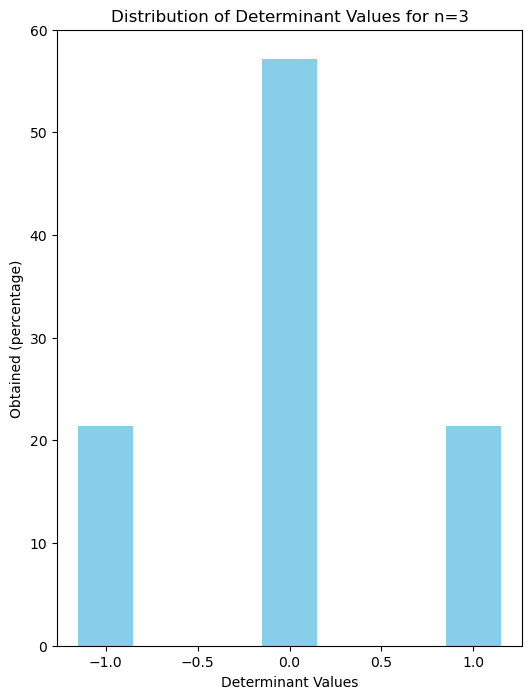

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# calculate all possible determinants from our matrices
def calculate_determinants(num_simulations):
    possible_values = [0, 1]
    matrices = list(product(possible_values, repeat=9))
    valid_matrices = [matrix for matrix in matrices if sum(matrix) in {4, 5}]
    
    determinants = []

    # ensure the matrices abide by the rue=les of the game
    for _ in range(num_simulations):
        for matrix in valid_matrices:
            matrix_np = np.array(matrix).reshape((3, 3))
            determinant = int(np.linalg.det(matrix_np))
            determinants.append(determinant)

    return determinants

# plot the given determinants
def plot_determinant_distribution(determinants, total_matrices):
    unique_determinants, counts = np.unique(determinants, return_counts=True)

    percentages = counts / len(determinants) * 100

    # plot bar chart
    plt.figure(figsize=(6, 8))
    plt.bar(unique_determinants, percentages, align='center', width=0.3, color='skyblue') 
    plt.title('Distribution of Determinant Values for n=3')
    plt.xlabel('Determinant Values')
    plt.ylabel('Obtained (percentage)')
    plt.show()

def main():
    num_simulations = 10000 # I chose a high number to reflect a level of accuracy in the probability
    matrices = list(product([0, 1], repeat=9))
    total_matrices = len([matrix for matrix in matrices if sum(matrix) in {4, 5}])

    determinants = calculate_determinants(num_simulations)
    plot_determinant_distribution(determinants, total_matrices)

if __name__ == "__main__":
    main()
